# <img src="https://miro.medium.com/v2/resize:fit:420/1*vapuy3cVTuwC62Z8Sw71ow.jpeg" width="75" height="65"> EDA 

In [51]:
import requests
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer 
# from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [53]:
ra = pd.read_csv('../datasets/ra_cleaned.csv')

In [54]:
aita = pd.read_csv('../datasets/aita_cleaned.csv')

In [55]:
ra.head(3)

,subreddit,selftext,gilded,title,subreddit_name_prefixed,hide_score,upvote_ratio,total_awards_received,is_reddit_media_domain,score,author_premium,edited,author_flair_richtext,gildings,is_self,author_flair_type,domain,allow_live_comments,archived,no_follow,is_crosspostable,over_18,awarders,can_gild,locked,treatment_tags,is_robot_indexable,num_comments,send_replies,author_patreon_flair,subreddit_subscribers,created_utc,num_crossposts,retrieved_utc,updated_utc,author_cakeday,subreddit_id_t5_2r0cn,removed_by_automod_filtered,removed_by_deleted,removed_by_reddit,removed_by_nan,thumbnail_nsfw,thumbnail_self,gildings_{},title_word_count,selftext_word_count
0,relationship_advice,none,0,I’m (30f) in love with my fiancé’s (34m) best ...,r/relationship_advice,1,1.0,0,1,1,1.0,1,1,{},1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,8871630,1682548523,0,1682548537,1682548538,0,1,0,0,0,0,0,1,1,10,1
1,relationship_advice,none,0,Did my relationship run its course?,r/relationship_advice,1,1.0,0,1,1,1.0,1,1,{},1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,8871630,1682548522,0,1682548537,1682548538,0,1,0,0,0,0,0,1,1,6,1
2,relationship_advice,TLDR: My mother wants me to go no contact with...,0,My mom (48f) wants me (18m) to cut contact wit...,r/relationship_advice,1,1.0,0,1,1,1.0,1,1,{},1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,8871627,1682548515,0,1682548528,1682548529,0,1,0,0,0,1,0,1,1,15,700


In [56]:
aita.head(3)

,allow_live_comments,archived,author_flair_richtext,author_flair_type,author_patreon_flair,author_premium,awarders,can_gild,created_utc,domain,edited,gilded,gildings,hide_score,is_crosspostable,is_reddit_media_domain,is_robot_indexable,is_self,locked,no_follow,num_comments,num_crossposts,over_18,score,selftext,send_replies,subreddit,subreddit_name_prefixed,subreddit_subscribers,title,total_awards_received,treatment_tags,upvote_ratio,retrieved_utc,updated_utc,author_cakeday,subreddit_id_t5_2txi0n,subreddit_id_t5_37roo,subreddit_id_t5_5iegdf,subreddit_id_t5_62obsy,subreddit_id_t5_6anqhn,subreddit_id_t5_6r00uj,subreddit_type_restricted,subreddit_type_user,removed_by_deleted,removed_by_nan,thumbnail_nsfw,thumbnail_other,thumbnail_self,gildings_'gid_2': 0,gildings_'gid_3': 0},gildings_{'gid_1': 0,gildings_{'gid_1': 1},gildings_{'gid_1': 4},gildings_{},title_word_count,selftext_word_count
0,1.0,1,1,1,1,1.0,1,1,1662322488,0,1,0,{},0.0,0,0,0,0,1,1,0,0,1,1,none,1,AITA,r/AITA,0,My cousin got his super hero skin refunded the...,0,1,1.0,1665460267,1680463321,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,25,1
1,1.0,1,0,0,0,NaN,1,0,1651946522,0,1,0,{},0.0,1,1,1,0,1,0,3,0,0,1,none,1,AITA,r/AITA,0,"Looks like an STD, is this what genital herpes...",0,1,1.0,1653960630,1680272326,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,35,1
2,1.0,1,1,1,1,1.0,1,1,1648703229,0,1,0,{},0.0,0,1,0,1,1,1,0,0,1,1,OG post here: https://old.reddit.com/r/AmIthe...,1,AITA,r/AITA,0,[UPDATE] WIBTA if I give away my tickets out o...,0,1,1.0,1654033635,1680218095,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,11,482


### Further cleaning, preprocessing, removing stop words, tokenizing, and lemmatizing selftext and title

In [57]:
# Define preprocessing functions

# Remove all non-word characters (everything except numbers and letters)
def remove_special_chars(text):
    text = re.sub(r"[^\w\s]", "", text)
    return text

# Use RegEx to tokenize the text
def tokenize(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    return tokens

# Lemmatize the tokens
def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    lem_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lem_tokens

# Remove stop words from the tokens
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if not token.lower() in stop_words]
    return filtered_tokens

# Apply preprocessing functions 
def apply_token(df):
    df['selftext'] = df['selftext'].apply(remove_special_chars)
    df['selftext'] = df['selftext'].apply(tokenize)
    df['selftext'] = df['selftext'].apply(lemmatize)
    df['selftext'] = df['selftext'].apply(remove_stopwords)

    df['title'] = df['title'].apply(remove_special_chars)
    df['title'] = df['title'].apply(tokenize)
    df['title'] = df['title'].apply(lemmatize)
    df['title'] = df['title'].apply(remove_stopwords)

    return df

# Remove numbers 
#https://stackoverflow.com/questions/73565193/re-sub-i-would-like-replace-list-of-words-following-number-with-some-string 
#https://stackoverflow.com/questions/68064934/changing-a-word-surrounded-by-numbers-using-re-sub 
def remove_numbers(words_list):
    # Iterate over each word in the list and remove any digits
    return [re.sub(r'\d+', '', word) for word in words_list]


In [58]:
ra = apply_token(ra)

In [59]:
ra['selftext'] = ra['selftext'].apply(remove_numbers)
ra['title'] = ra['title'].apply(remove_numbers) 

In [60]:
ra[['selftext', 'title']].head(10) 

,selftext,title
0,[none],"[Im, f, love, fiancés, m, best, friend]"
1,[none],"[relationship, run, course]"
2,"[TLDR, mother, want, go, contact, aunt, group,...","[mom, f, want, m, cut, contact, aunt, f, people]"
3,[none],"[F, attracted, men, late, searly, , ruining, l..."
4,[none],"[jewelry, shop]"
5,"[recently, started, going, University, happene...","[m, flirt, girl, f, incredibly, awkward]"
6,[none],"[M, kissed, girl, F, ha, boyfriend]"
7,[none],"[mom, , want, m, cut, contact, aunt, , people]"
8,[none],"[tell, boyfriend, M, saying, inappropriate, th..."
9,[none],"[F, stuck, relationship, boyfriend, M]"


In [61]:
aita = apply_token(aita)

In [62]:
aita['selftext'] = aita['selftext'].apply(remove_numbers)
aita['title'] = aita['title'].apply(remove_numbers) 

In [63]:
aita[['selftext', 'title']].head(10)  

,selftext,title
0,[none],"[cousin, got, super, hero, skin, refunded, mon..."
1,[none],"[Looks, like, STD, genital, herpes, look, like..."
2,"[OG, post, httpsoldredditcomrAmItheAssholecomm...","[UPDATE, WIBTA, give, away, ticket, spite]"
3,[none],"[Hey, found, picture]"
4,"[clear, pinned, post, sidebar, complete, lack,...","[Read, directed, front, page, modmail]"
5,[none],"[AITA, getting, upset, husband, wont, let, fam..."
6,[none],"[AITA, wanting, boyfriend, cut, holiday, short]"
7,[none],"[AITA, refusing, Xmas, present, kid, dreadful,..."
8,[none],"[Aita, wanting, husband, use, inheritance]"
9,[none],"[AITA, telling, friend, let, child, couple]"


## Charts

### Bar charts for most used words in each subreddit 

In [64]:
cvec = CountVectorizer()

In [65]:
# Set titles as strings so the code can pass through 
racv = ra['title'].astype(str)
aitacv = aita['title'].astype(str)

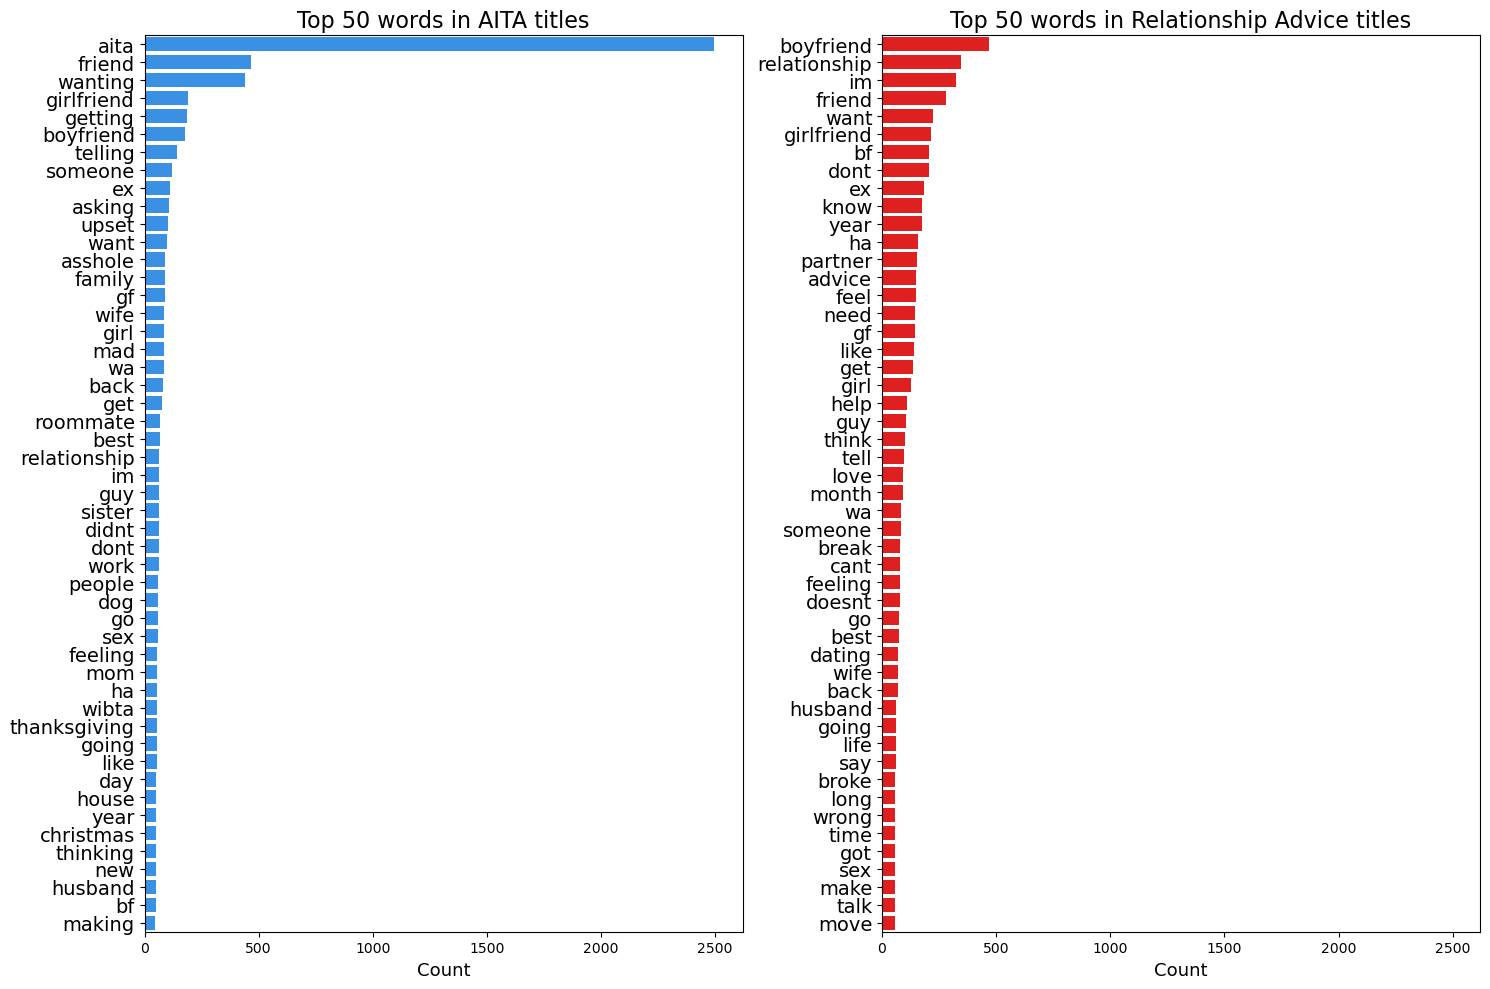

In [66]:
# AITA - fit/transform count vectorizer to title and get the 50 phrases with the highest count
vec_aita = cvec.fit_transform(aitacv)
vec_aita = pd.DataFrame(vec_aita.toarray(), columns = cvec.get_feature_names_out())
aita_title_50 = vec_aita.sum().sort_values(ascending=False).head(50)

# Relationship Advice - fit/transform count vectorizer to title and get the 50 phrases with the highest count
vec_ra = cvec.fit_transform(racv)
vec_ra = pd.DataFrame(vec_ra.toarray(), columns = cvec.get_feature_names_out())
ra_title_50 = vec_ra.sum().sort_values(ascending=False).head(50)

# Plot 
fit, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,10), sharex = True)

sns.barplot(y=aita_title_50.index.values, x = aita_title_50,color='dodgerblue',ax=ax[0])
ax[0].set_title('Top 50 words in AITA titles',fontsize=16)
ax[0].set_xlabel('Count', fontsize=13)
plt.setp(ax[0].get_yticklabels(), fontsize=14)

sns.barplot(y=ra_title_50.index.values, x = ra_title_50,color='red',ax=ax[1])
ax[1].set_title('Top 50 words in Relationship Advice titles',fontsize=16)
ax[1].set_xlabel('Count', fontsize=13)
plt.setp(ax[1].get_yticklabels(), fontsize=14)

plt.tight_layout()

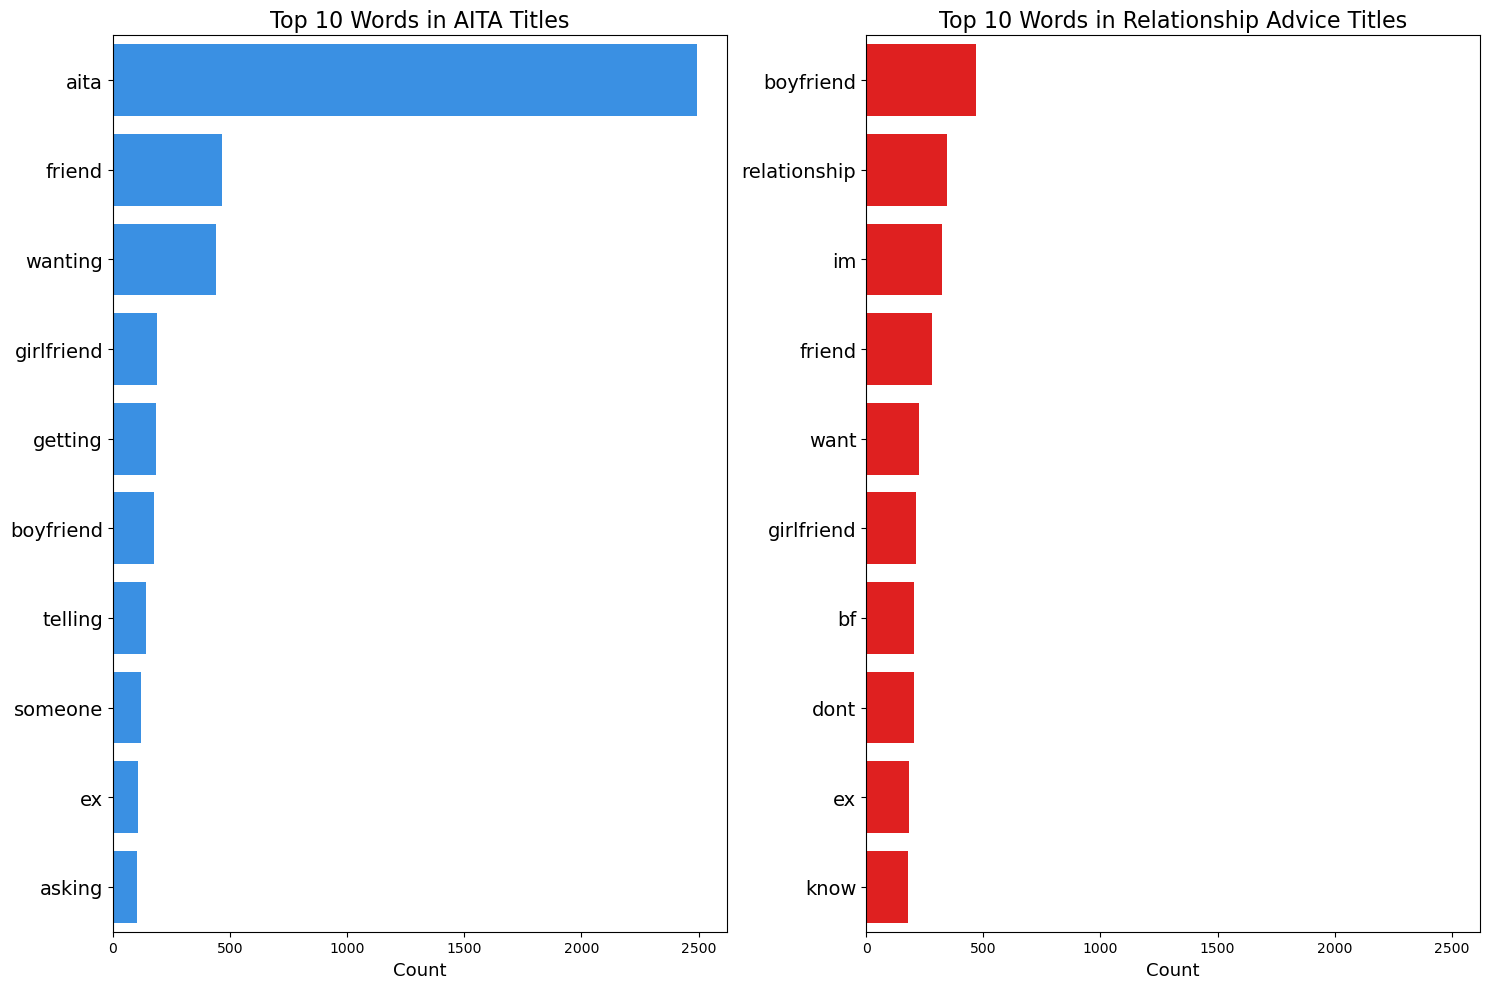

In [67]:
# AITA - fit/transform count vectorizer to title and get the top 10 phrases with the highest count
vec_aita = cvec.fit_transform(aitacv)
vec_aita = pd.DataFrame(vec_aita.toarray(), columns = cvec.get_feature_names_out())
aita_title_10 = vec_aita.sum().sort_values(ascending=False).head(10)

# Relationship Advice - fit/transform count vectorizer to title and get the top 10 phrases with the highest count
vec_ra = cvec.fit_transform(racv)
vec_ra = pd.DataFrame(vec_ra.toarray(), columns = cvec.get_feature_names_out())
ra_title_10 = vec_ra.sum().sort_values(ascending=False).head(10)

# Plot 
fit, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,10), sharex = True)

sns.barplot(y=aita_title_10.index.values, x = aita_title_10,color='dodgerblue',ax=ax[0])
ax[0].set_title('Top 10 Words in AITA Titles',fontsize=16)
ax[0].set_xlabel('Count', fontsize=13)
plt.setp(ax[0].get_yticklabels(), fontsize=14)

sns.barplot(y=ra_title_10.index.values, x = ra_title_10,color='red',ax=ax[1])
ax[1].set_title('Top 10 Words in Relationship Advice Titles',fontsize=16)
ax[1].set_xlabel('Count', fontsize=13)
plt.setp(ax[1].get_yticklabels(), fontsize=14)

plt.tight_layout() 

In [68]:
# Set selftext as strings so the code can pass through 
racv = ra['selftext'].astype(str)
aitacv = aita['selftext'].astype(str)

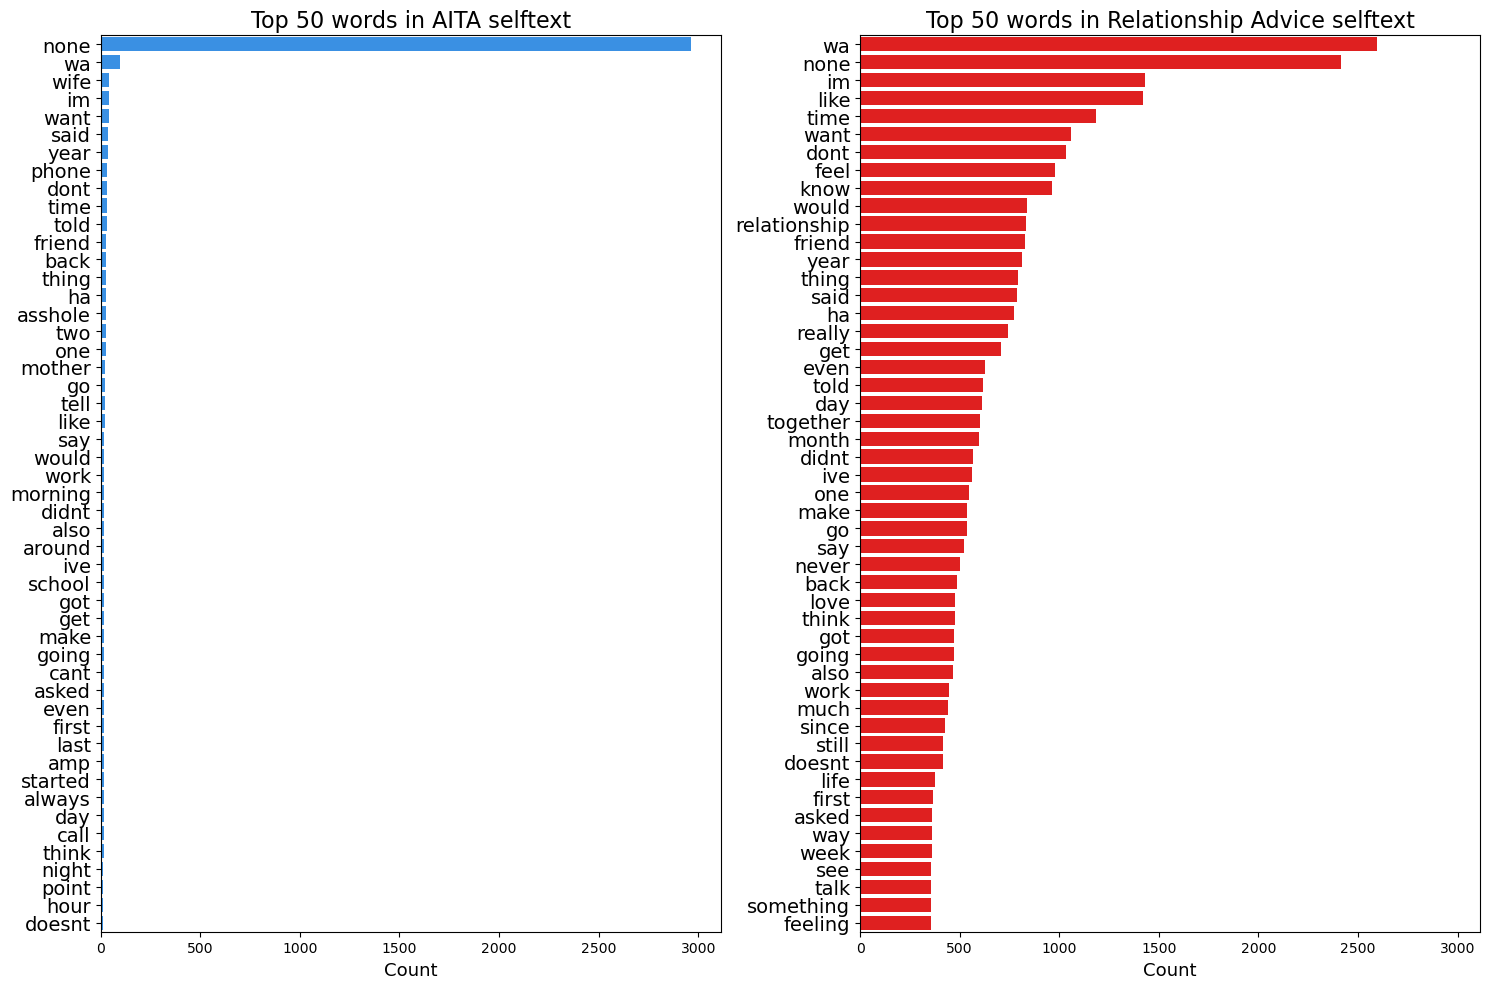

In [69]:
# AITA - fit/transform count vectorizer to selftext and get the 50 phrases with the highest count
vec_aita = cvec.fit_transform(aitacv)
vec_aita = pd.DataFrame(vec_aita.toarray(), columns = cvec.get_feature_names_out())
aita_selftext_50 = vec_aita.sum().sort_values(ascending=False).head(50)

# Relationship Advice - fit/transform count vectorizer to selftext and get the 50 phrases with the highest count
vec_ra = cvec.fit_transform(racv)
vec_ra = pd.DataFrame(vec_ra.toarray(), columns = cvec.get_feature_names_out())
ra_selftext_50 = vec_ra.sum().sort_values(ascending=False).head(50)

# plot results
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,10), sharex = True)

sns.barplot(y=aita_selftext_50.index.values, x = aita_selftext_50,color='dodgerblue',ax=ax[0])
ax[0].set_title('Top 50 words in AITA selftext',fontsize=16)
ax[0].set_xlabel('Count', fontsize=13)
plt.setp(ax[0].get_yticklabels(), fontsize=14)

sns.barplot(y=ra_selftext_50.index.values, x = ra_selftext_50,color='red',ax=ax[1])
ax[1].set_title('Top 50 words in Relationship Advice selftext',fontsize=16)
ax[1].set_xlabel('Count', fontsize=13)
plt.setp(ax[1].get_yticklabels(), fontsize=14)

plt.tight_layout()

### Boxplots for word counts

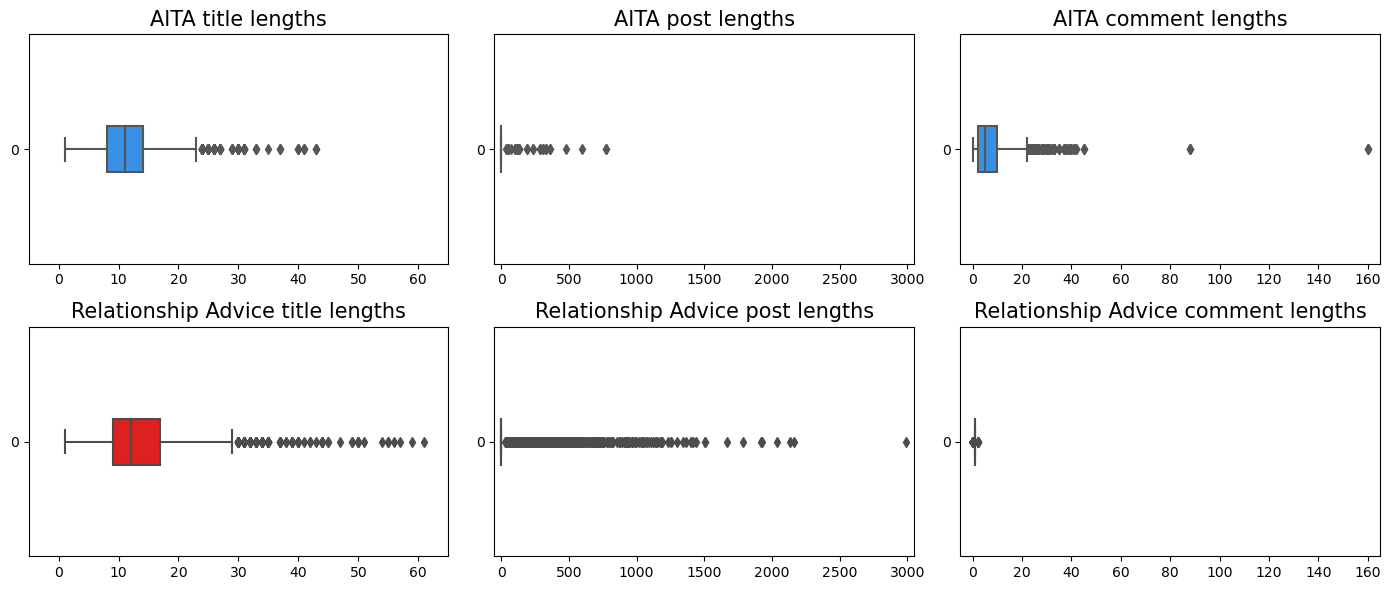

In [70]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(14, 6))

sns.boxplot(pd.to_numeric(aita['title_word_count']), ax=ax[0][0], width=0.2, orient='h', color='dodgerblue')
ax[0][0].set_title('AITA title lengths', fontsize=15)
ax[0][0].set_xlim(-5,65)

sns.boxplot(aita['selftext_word_count'], ax=ax[0][1], width=0.2, orient='h', color='dodgerblue')
ax[0][1].set_title('AITA post lengths', fontsize=15)
ax[0][1].set_xlim(-50,3050)

sns.boxplot(aita['num_comments'], ax=ax[0][2], width=0.2, orient='h', color='dodgerblue')
ax[0][2].set_title('AITA comment lengths', fontsize=15)
ax[0][2].set_xlim(-5,165)

sns.boxplot(pd.to_numeric(ra['title_word_count']), ax=ax[1][0], width=0.2, orient='h', color='red')
ax[1][0].set_title('Relationship Advice title lengths', fontsize=15)
ax[1][0].set_xlim(-5,65) 

sns.boxplot(ra['selftext_word_count'], ax=ax[1][1], width=0.2, orient='h', color='red')
ax[1][1].set_title('Relationship Advice post lengths', fontsize=15)
ax[1][1].set_xlim(-50,3050)

sns.boxplot(ra['num_comments'], ax=ax[1][2], width=0.2, orient='h', color='red')
ax[1][2].set_title('Relationship Advice comment lengths', fontsize=15)
ax[1][2].set_xlim(-5,165)

plt.tight_layout()

### Venn Diagram

In [71]:
#https://www.geeksforgeeks.org/how-to-create-and-customize-venn-diagrams-in-python/
# pip install matplotlib-venn

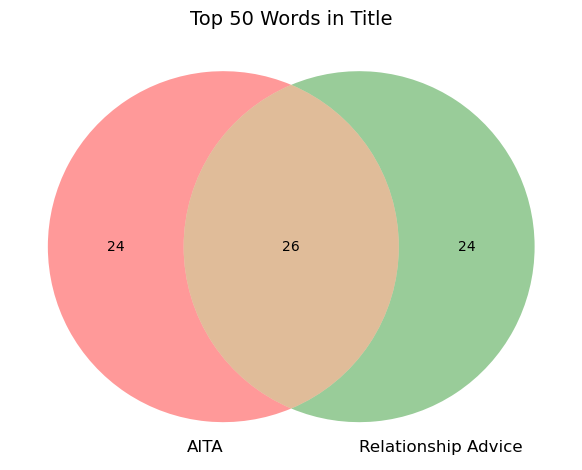

In [72]:
from matplotlib_venn import venn2

aita_set = set(aita_title_50.index)
ra_set = set(ra_title_50.index)
venn2([aita_set, ra_set], set_labels=('AITA', 'Relationship Advice'))
plt.title('Top 50 Words in Title', fontsize=14)
plt.tight_layout(); 

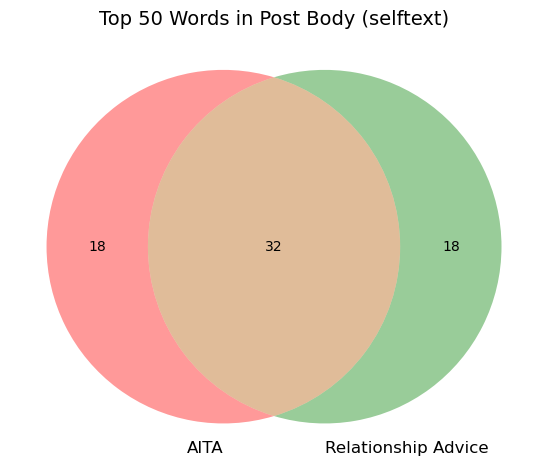

In [73]:
aita_set = set(aita_selftext_50.index)
ra_set = set(ra_selftext_50.index)
venn2([aita_set, ra_set], set_labels=('AITA', 'Relationship Advice'))
plt.title('Top 50 Words in Post Body (selftext)', fontsize=14)
plt.tight_layout();

I wanted to see just how many words were common in both subreddits as it looked like there were some repeats. Hopefully the high number of common shared words in selftext will not cause issues with modeling, as some of the shared words are 'wa, im, none, dont'. I assumed the titles would be more likely to be a better predictor since there are no missing values in the titles, but there are many missing selftext values. It seems that the titles will still be a better predictor considering the shared words. 

### Save to csv

In [74]:
ra.to_csv('../datasets/ra_eda.csv', index=False)

In [75]:
aita.to_csv('../datasets/aita_eda.csv', index=False) 